In [1]:
#Load the data
from src.main import loadData
import matplotlib.pyplot as plt
X, y = loadData()


In [2]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)



In [3]:
#fit creation & model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1061
           1       0.98      0.97      0.98      1027
           2       1.00      1.00      1.00      1186

    accuracy                           0.98      3274
   macro avg       0.98      0.98      0.98      3274
weighted avg       0.98      0.98      0.98      3274



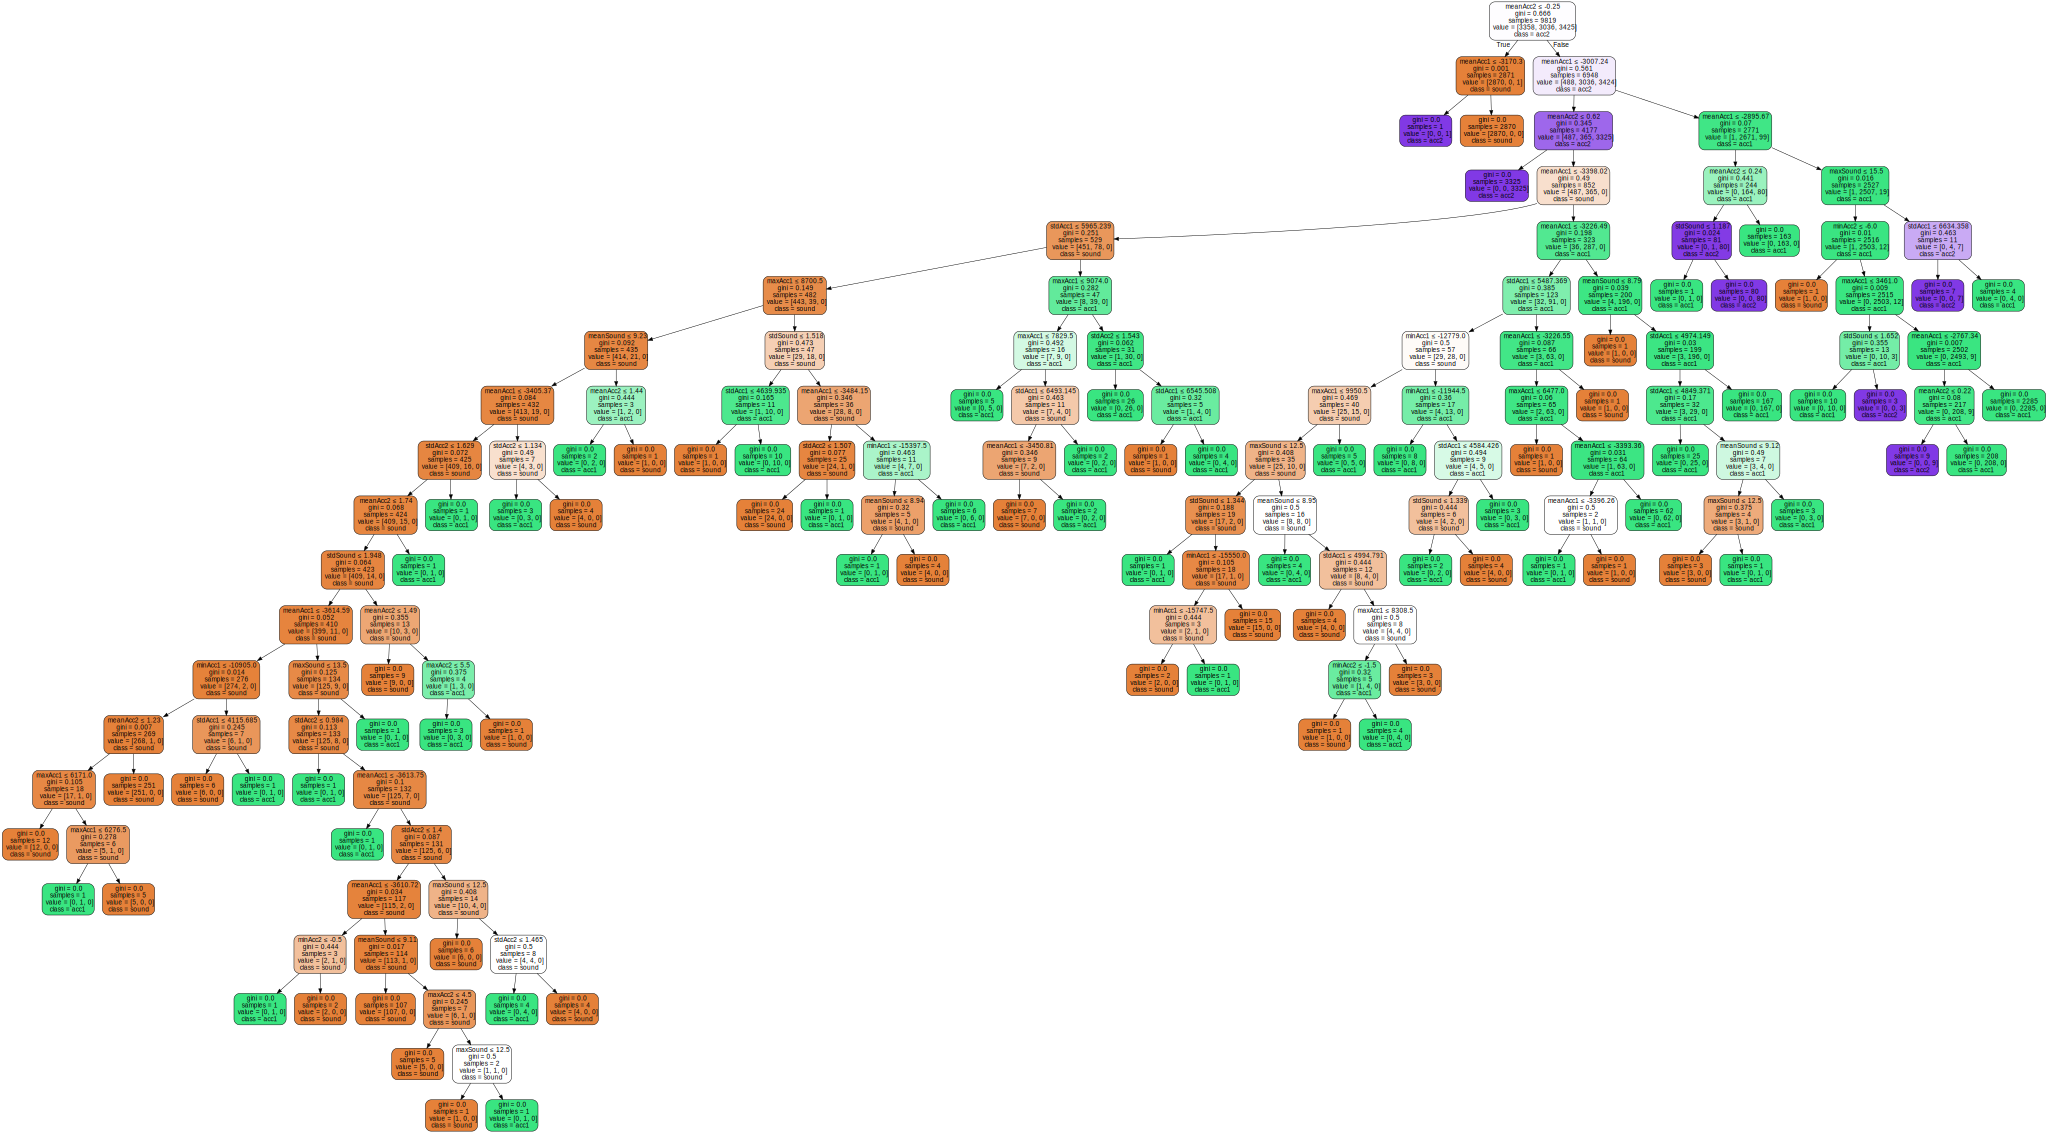

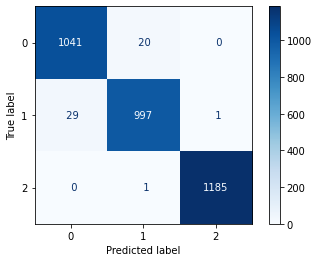

In [8]:
#first plotting
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, values_format="3.0f")

#show decision tree
import graphviz
from sklearn import tree
def show_decision_tree(clf, data_feature_names, data_target_names, name=""):
    """This function visualize a decision tree"""
    dot_data = tree.export_graphviz(clf, out_file=None) 
    graph = graphviz.Source(dot_data)
    graph.render(name) 
    dot_data = tree.export_graphviz(clf,                                    
                                    out_file=None,  
                                    filled=True,
                                    feature_names=data_feature_names,  
                                    class_names=data_target_names,
                                    rounded=True,  
                                    special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph
feature_names = ['minAcc1','minAcc2','minSound','maxAcc1','maxAcc2','maxSound','meanAcc1','meanAcc2','meanSound','stdAcc1','stdAcc2','stdSound']
target_names = ["sound", "acc1", "acc2"]
show_decision_tree(model, feature_names, target_names, "./graph")

In [15]:
#Grid Search
from sklearn.model_selection import GridSearchCV
import numpy as np
#change parameters
parameters = {
    'max_depth': range(1,25),
    'random_state': range(1,100),
    'min_impurity_decrease': (0.0,1.0)
}

#gridsearch 
clf=DecisionTreeClassifier()
model=GridSearchCV(clf,parameters,verbose=1,cv=5,n_jobs=-1)
model.fit(X_train,y_train)



Fitting 5 folds for each of 4752 candidates, totalling 23760 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 25),
                         'min_impurity_decrease': (0.0, 1.0),
                         'random_state': range(1, 100)},
             verbose=1)

max_depth: 10
min_impurity_decrease: 0.0
random_state: 1
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1061
           1       0.98      0.97      0.97      1027
           2       1.00      1.00      1.00      1186

    accuracy                           0.98      3274
   macro avg       0.98      0.98      0.98      3274
weighted avg       0.98      0.98      0.98      3274



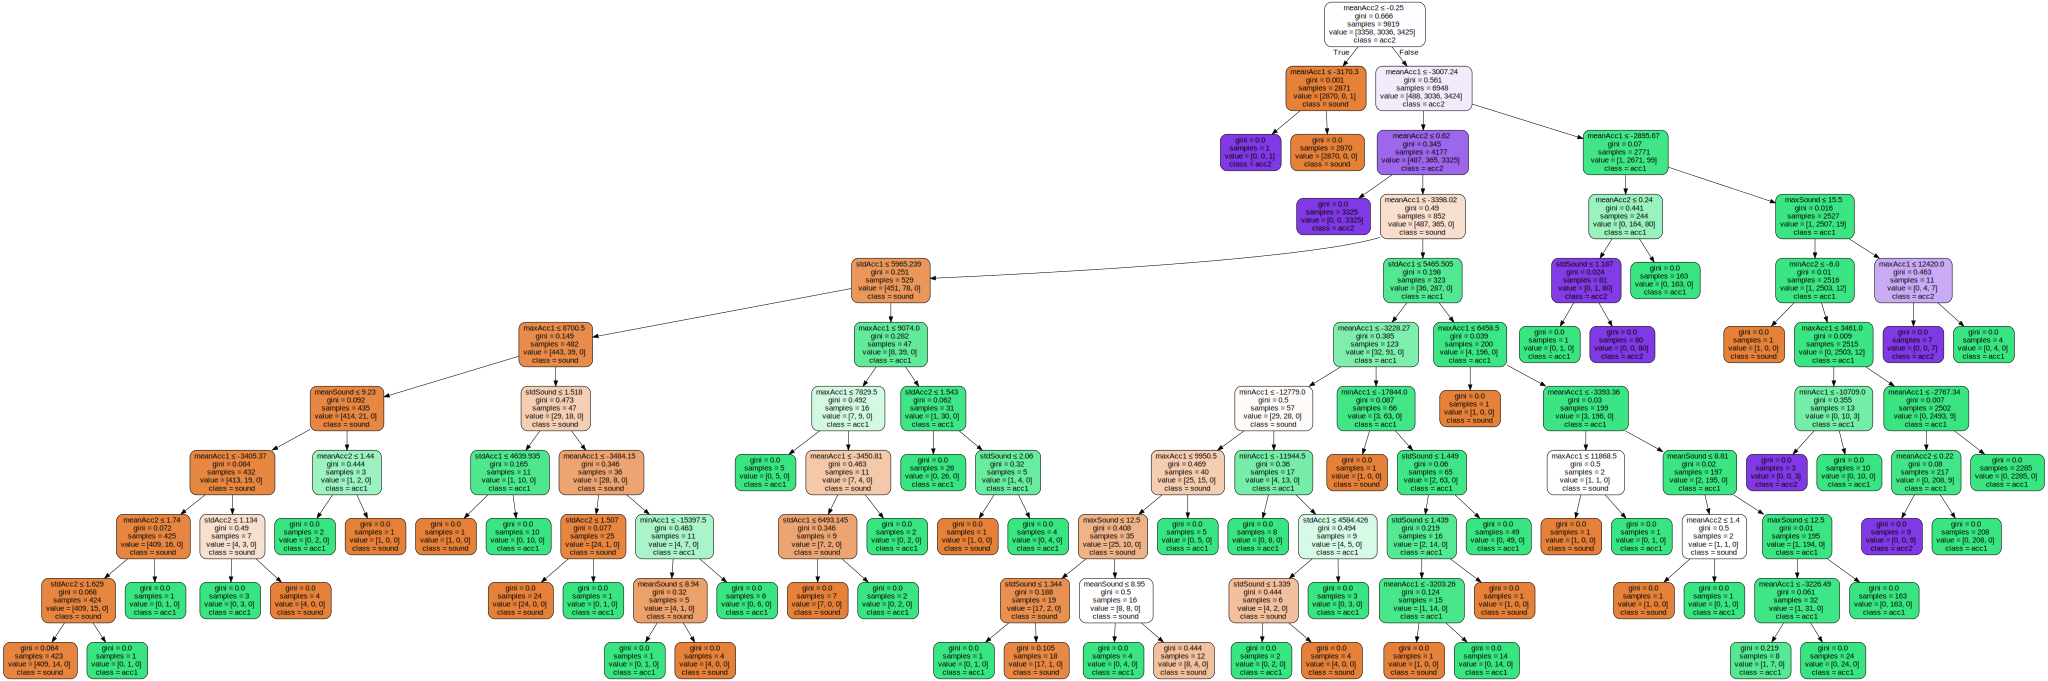

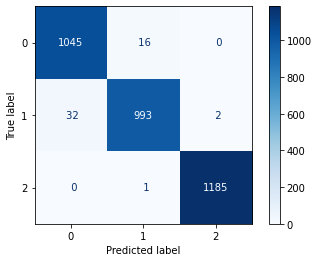

In [17]:
#display
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, model.best_params_[param_name]))

#take the best
bestModel=model.best_estimator_

#predict
y_pred = bestModel.predict(X_test)
print(classification_report(y_test, y_pred))
#display
plot_confusion_matrix(bestModel, X_test, y_test, cmap=plt.cm.Blues, values_format="3.0f")

#display decision tree
show_decision_tree(bestModel, feature_names, target_names, "./graph")